# Exercici 1

Agafa un conjunt de dades de tema que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("heart_2020_cleaned.csv")

This dataset is the 2020 annual CDC survey data of 400k adults related to their health status. People were asked about the following:
* If they have heart disease
* Their body mass index
* If they are or were smokers
* If they are heavy drinkers
* If they ever had a stroke
* Their physical and mental health during the last 30 days
* If they have difficulties walking
* Their sex
* Their age
* Their race
* If they are diabetic
* If they were physically active outside their job during the last 30 days
* Their general health
* Their average sleep time
* If they have asthma
* If they had cronic kidney disease
* If they ever had skin cancer

In [7]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


We will take the variable BMI, which is the Body Mass Index. It is used to categorize people's weight as underweight (<18.5), normal weight (18.5-25), or overweight (>25) using their body mass and height.

In [16]:
print("BMI mean:", df["BMI"].mean())
print("BMI mode:", df["BMI"].mode())
print("BMI median:", df["BMI"].median())
print("BMI standard deviation:", df["BMI"].std())

BMI mean: 28.325398520926328
BMI mode: 0    26.63
dtype: float64
BMI median: 27.34
BMI standard deviation: 6.356100200471519


# Exercici 2

Continuant amb les dades, selecciona dos atributs i calcula'n la seva correlació. 

In [18]:
df = df.replace("No", 0)

In [19]:
df = df.replace("Yes", 1)

In [20]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


Columns where the answer is yes or no has been transformed into 0 and 1 so that we can calculate correlation with those results too.

In [8]:
df["PhysicalHealth"].corr(df["SleepTime"]).round(2)

-0.06

There is no correlation between physical health and sleep time.

# Exercici 3

Continuant amb les dades, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

In [23]:
df.corr().round(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.00,0.05,0.11,-0.03,0.20,0.17,0.03,0.20,-0.10,0.01,0.04,0.15,0.09
BMI,0.05,1.00,0.02,-0.04,0.02,0.11,0.06,0.18,-0.15,-0.05,0.09,0.05,-0.03
Smoking,0.11,0.02,1.00,0.11,0.06,0.12,0.09,0.12,-0.10,-0.03,0.02,0.03,0.03
AlcoholDrinking,-0.03,-0.04,0.11,1.00,-0.02,-0.02,0.05,-0.04,0.02,-0.01,-0.00,-0.03,-0.01
Stroke,0.20,0.02,0.06,-0.02,1.00,0.14,0.05,0.17,-0.08,0.01,0.04,0.09,0.05
PhysicalHealth,0.17,0.11,0.12,-0.02,0.14,1.00,0.29,0.43,-0.23,-0.06,0.12,0.14,0.04
MentalHealth,0.03,0.06,0.09,0.05,0.05,0.29,1.00,0.15,-0.10,-0.12,0.11,0.04,-0.03
DiffWalking,0.20,0.18,0.12,-0.04,0.17,0.43,0.15,1.00,-0.28,-0.02,0.10,0.15,0.06
PhysicalActivity,-0.10,-0.15,-0.10,0.02,-0.08,-0.23,-0.10,-0.28,1.00,0.00,-0.04,-0.08,-0.00
SleepTime,0.01,-0.05,-0.03,-0.01,0.01,-0.06,-0.12,-0.02,0.00,1.00,-0.05,0.01,0.04


[Text(0.5, 1, 'Correlations')]

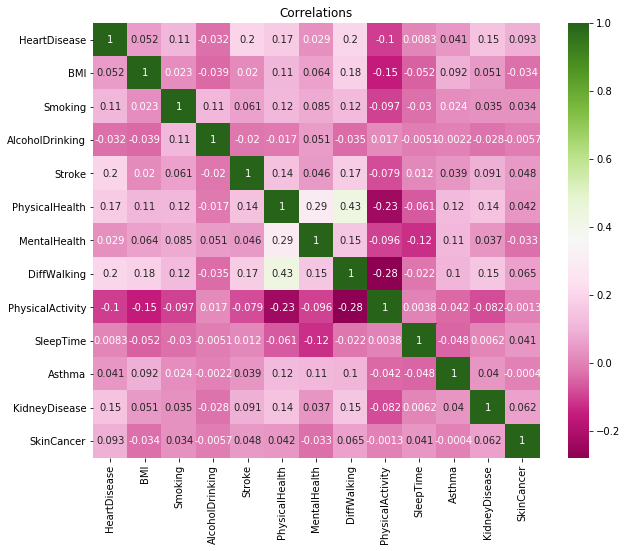

In [26]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = "PiYG").set(
    title = "Correlations")

There seems to not be any correlation between the variables. There is a slight relation between difficulty walking and perceived physical health, but it is not significant.

# Exercici 4

Continuant amb les dades, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

In [20]:
def geo_mean(i):
    return np.exp(np.log(i).mean()) #written this way to avoid overflow

res = geo_mean(df["SleepTime"]).round(2)
print("Geometric mean of sleep time:", res)

Geometric mean of sleep time: 6.94


In [26]:
def har_mean(i):
    return len(i) / np.sum(1.0 / i) 

res = har_mean(df["SleepTime"]).round(2)
print("Harmonic mean of sleep time:", res)

Harmonic mean of sleep time: 6.73


Both geometric and harmonic means are mainly used for economics. 

The geometric mean is suitable for data that show serial correlation, like investments. It can be calculated by multiplying all the numbers in the data set and taking the nth root, where n is the total count of values in the data set.

The harmonic mean is usually used for averages of rates or price-earning ratios. It is calculated by dividing the total count of values by the reciprocal of each value.